# 0-)Imports

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten

import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np
import tensorflow        as tf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 1-)Data Analysis

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
50000
50000
10000
10000


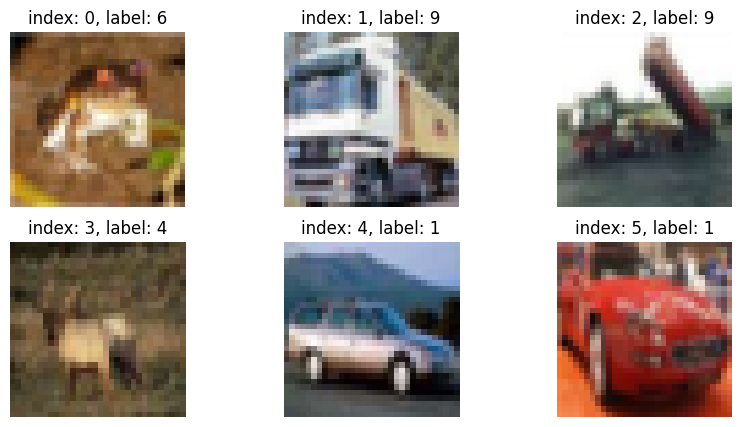

In [4]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i])
    plt.title(f"index: {i}, label: {y_train[i][0]}")
    plt.axis("off")

In [5]:
# Normalization
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [6]:
# One Hot Encoding

# there are 10 classes in cifar10
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# 2-) Modelling

In [8]:
from tensorflow.keras.initializers import HeNormal

model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512, activation="relu", kernel_initializer=HeNormal()))
model.add(Dense(256, activation="tanh", kernel_initializer=HeNormal()))
model.add(Dense(10, activation="softmax"))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer ="adam",
              loss      ="categorical_crossentropy",
              metrics   = [tf.keras.metrics.Precision(name="precision"),
                           tf.keras.metrics.Recall(name="recall"),
                           tf.keras.metrics.AUC(name="auc"),
                           "accuracy"])

In [14]:
early_stopping = EarlyStopping(monitor              = "val_loss",
                               patience             = 10,
                               mode                 = 'min',
                               restore_best_weights = True)
model_checkpoint = ModelCheckpoint(filepath          = "ANN_Cifar10_BestModel.keras",#name
                                   monitor           = "val_loss",
                                   mode              = 'min',
                                   save_best_only    = True)

In [15]:
# Convert one-hot encoded labels back to integer labels
y_train_integers = np.argmax(y_train, axis=1)

# Compute class weights
class_weights = {i: len(y_train_integers) / (10 * np.bincount(y_train_integers)[i]) for i in range(10)}

# Print class weights to verify
print(class_weights)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}


In [16]:
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=60,
                    callbacks=[early_stopping, model_checkpoint],
                    validation_split=0.2,
                    class_weight=class_weights
)
#train:40000
#val  :10000
#test :10000

Epoch 1/200
667/667 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5876 - auc: 0.9243 - loss: 1.1549 - precision: 0.7406 - recall: 0.4298 - val_accuracy: 0.4947 - val_auc: 0.8808 - val_loss: 1.4593 - val_precision: 0.6322 - val_recall: 0.3684
Epoch 2/200
667/667 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5973 - auc: 0.9270 - loss: 1.1329 - precision: 0.7430 - recall: 0.4450 - val_accuracy: 0.5016 - val_auc: 0.8834 - val_loss: 1.4402 - val_precision: 0.6311 - val_recall: 0.3613
Epoch 3/200
667/667 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.6020 - auc: 0.9288 - loss: 1.1203 - precision: 0.7469 - recall: 0.4503 - val_accuracy: 0.5004 - val_auc: 0.8821 - val_loss: 1.4552 - val_precision: 0.6287 - val_recall: 0.3680
Epoch 4/200
667/667 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.6007 - auc: 0.9295 - loss: 1.1147 - precision: 0.7433 - recall: 0.4546 - val_accuracy: 0.4933 - val_auc: 0.8765 - val_loss: 1.4787 - val_precision: 0.6422 - val_recall: 0.3520
Epoch 5/200
667/667 

# 3-) Model Testing

In [17]:
def test_set_evaluate(model,X_test,y_test):
    test_loss, test_precision, test_recall, test_auc, test_accuracy = model.evaluate(X_test,y_test)

    print("\nTest Accuracy: %.6f%%" % (100.0 * test_accuracy))
    print("\nTest Loss: %.6f%%" % (100.0 * test_loss))
    print("\nTest Precision: %.6f%%" % (100.0 * test_precision))
    print("\nTest Recall: %.6f%%" % (100.0 * test_recall))
    print("\nTest AUC: %.6f%%" % (100.0 * test_auc))

test_set_evaluate(model,X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5014 - auc: 0.8870 - loss: 1.4158 - precision: 0.6432 - recall: 0.3574

Test Accuracy: 49.810001%

Test Loss: 143.099368%

Test Precision: 63.527125%

Test Recall: 35.949999%

Test AUC: 88.486552%


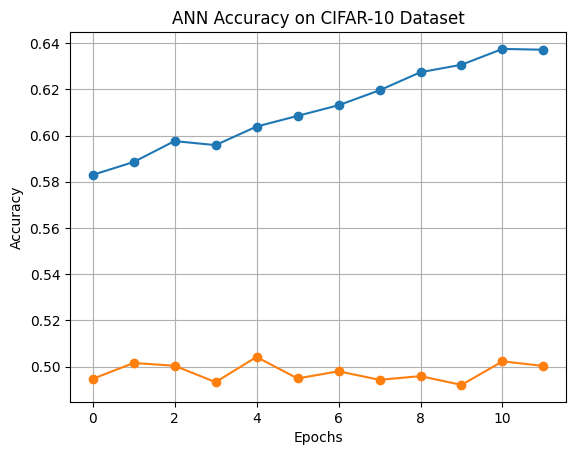

In [20]:
plt.figure()
plt.plot(history.history["accuracy"],
         marker="o",
         label="Training Accuracy")
plt.plot(history.history["val_accuracy"],
         marker="o",
         label="Validation Accuracy")
plt.title("ANN Accuracy on CIFAR-10 Dataset")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

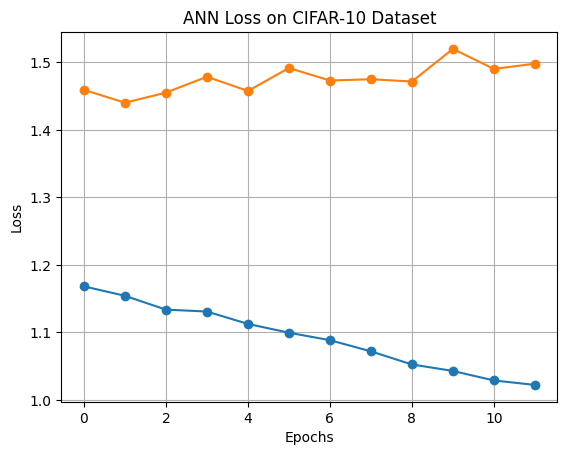

In [22]:
plt.figure()
plt.plot(history.history["loss"],
         marker="o",
         label="Training Loss")
plt.plot(history.history["val_loss"],
         marker="o",
         label="Validation Loss")
plt.title("ANN Loss on CIFAR-10 Dataset")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [23]:
#model save

#model.save("cifar10_Best_model.keras")

#model load

#model.load("cifar10_Best_model.keras")